## 1. AtliQ Hardware Database Documentation

This documentation provides detailed information about the AtliQ Hardware database, including the structure of the tables, the relationships between them, and the fields within each table. This database is used to store and analyze sales data, customer information, product details, and other relevant data for AtliQ Hardware.

The database contains the following tables:
1. **dim_customer**
2. **dim_product**
3. **fact_pre_discount**
4. **fact_manufacturing_cost**
5. **fact_gross_price**
6. **fact_sales_monthly**

### Table Descriptions

#### 1. `dim_customer`
This table contains information about customers.

| Column       | Data Type | Description                       |
|--------------|------------|-----------------------------------|
| customer_code| INTEGER    | Unique identifier for each customer |
| customer     | TEXT       | Name of the customer              |
| platform     | TEXT       | Platform through which the customer interacts (e.g., E-Commerce, Brick & Mortar) |
| channel      | TEXT       | Channel of the customer (e.g., Distributor, Retailer) |
| market       | TEXT       | Market in which the customer operates (e.g., India, South Korea) |
| sub_zone     | TEXT       | Sub-zone within the market        |
| region       | TEXT       | Region where the customer is located (e.g., APAC) |

#### 2. `dim_product`
This table contains details about products.

| Column       | Data Type | Description                       |
|--------------|------------|-----------------------------------|
| product_code | TEXT       | Unique identifier for each product |
| division     | TEXT       | Division to which the product belongs |
| segment      | TEXT       | Segment category of the product   |
| category     | TEXT       | Product category                  |
| product      | TEXT       | Product name                      |
| variant      | TEXT       | Variant of the product            |

#### 3. `fact_pre_discount`
This table contains information about pre-discount prices for products.

| Column         | Data Type | Description                       |
|----------------|------------|-----------------------------------|
| product_code   | TEXT       | Unique identifier for each product |
| date           | TEXT       | Date for the recorded price       |
| pre_discount_price | REAL   | Price of the product before any discounts |

#### 4. `fact_manufacturing_cost`
This table contains manufacturing cost details for products.

| Column             | Data Type  | Description                        |
|--------------------|------------|----------------------------------- |
| product_code       | TEXT       | Unique identifier for each product |
| date               | TEXT       | Date for the recorded cost         |
| manufacturing_cost | REAL       | Cost of manufacturing the product  |

#### 5. `fact_gross_price`
This table contains information about the gross price of products.

| Column         | Data Type  | Description                        |
|----------------|------------|----------------------------------- |
| product_code   | TEXT       | Unique identifier for each product |
| date           | TEXT       | Date for the recorded price        |
| gross_price    | REAL       | Gross price of the product         |

#### 6. `fact_sales_monthly`
This table contains monthly sales data.

| Column         | Data Type  | Description                         |
|----------------|------------|-----------------------------------  |
| date           | TEXT       | Date for the recorded sales         |
| product_code   | TEXT       | Unique identifier for each product  |
| customer_code  | INTEGER    | Unique identifier for each customer |
| sold_quantity  | INTEGER    | Quantity of products sold           |
| fiscal_year    | INTEGER    | Fiscal year for the sales record    |

## 2. Data Collection

### 2.1 Connection to the Database

In [74]:
import pandas as pd
import sqlite3
import os

# Connect to the database
con = sqlite3.connect('/Users/user/Downloads/atliq_db.sqlite3')

# Get all table names in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Ensure the output directory exists
output_dir = '/Users/user/Downloads'
os.makedirs(output_dir, exist_ok=True)

# List to store the paths of exported CSV files
csv_files = []

# Iterate over each table and export to a CSV file
for table_name in tables:
    table_name = table_name[0]  # Extract table name from tuple
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, con)
    csv_output_path = os.path.join(output_dir, f"{table_name}.csv")
    df.to_csv(csv_output_path, index=False)
    csv_files.append(csv_output_path)
    print(f"Exported {table_name} to {csv_output_path}")

# Close the database connection
con.close()

csv_files

Exported dim_customer to /Users/user/Downloads/dim_customer.csv
Exported dim_product to /Users/user/Downloads/dim_product.csv
Exported fact_pre_discount to /Users/user/Downloads/fact_pre_discount.csv
Exported fact_manufacturing_cost to /Users/user/Downloads/fact_manufacturing_cost.csv
Exported fact_gross_price to /Users/user/Downloads/fact_gross_price.csv
Exported fact_sales_monthly to /Users/user/Downloads/fact_sales_monthly.csv


['/Users/user/Downloads/dim_customer.csv',
 '/Users/user/Downloads/dim_product.csv',
 '/Users/user/Downloads/fact_pre_discount.csv',
 '/Users/user/Downloads/fact_manufacturing_cost.csv',
 '/Users/user/Downloads/fact_gross_price.csv',
 '/Users/user/Downloads/fact_sales_monthly.csv']

In [1]:
# Convert the results to a pandas DataFrame for better visualization
import pandas as pd
import matplotlib.pyplot as plt

### connect to the database
import sqlite3
con = sqlite3.connect('/Users/user/Downloads/atliq_db.sqlite3') 
#downloaded database just like you read csv files

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

### execute simple query in Python with your connection
query="""Select * from 
dim_customer
LIMIT 10
"""
dim_customer=pd.read_sql_query(query, con)
dim_customer.head()

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


### 2.2 **Sales Data**: Collect data on sales transactions, including product ID, quantity sold, sale price, date of sale, and market/region.

In [2]:
# Define the SQL query
query = """
SELECT 
    fsm.product_code AS product_id,
    fsm.sold_quantity,
    fgm.gross_price AS sale_price,
    fsm.date AS date_of_sale,
    dc.market,
    dc.region
FROM 
    fact_sales_monthly fsm
JOIN 
    dim_product dp ON fsm.product_code = dp.product_code
JOIN 
    dim_customer dc ON fsm.customer_code = dc.customer_code
JOIN 
    fact_gross_price fgm ON fsm.product_code = fgm.product_code AND fsm.fiscal_year = fgm.fiscal_year
"""

# Execute the query and fetch the results
sales_data = con.execute(query).fetchall()

columns = ['product_id', 'sold_quantity', 'sale_price', 'date_of_sale', 'market', 'region']
sales_df = pd.DataFrame(sales_data, columns=columns)

# Display the first few rows of the DataFrame to ensure everything is correct
sales_df.head()

,product_id,sold_quantity,sale_price,date_of_sale,market,region
0,A0118150101,51,15.3952,2017-09-01,India,APAC
1,A0118150101,77,15.3952,2017-09-01,India,APAC
2,A0118150101,17,15.3952,2017-09-01,Indonesia,APAC
3,A0118150101,6,15.3952,2017-09-01,Indonesia,APAC
4,A0118150101,5,15.3952,2017-09-01,Philiphines,APAC


### 2.3 **Product Data**: Gather information on product categories, specifications, and pricing.

In [3]:
# Define the SQL query to gather product information
query = """
SELECT 
    dp.product_code,
    dp.division,
    dp.segment,
    dp.category,
    dp.product,
    dp.variant,
    fgm.gross_price
FROM 
    dim_product dp
LEFT JOIN 
    fact_gross_price fgm ON dp.product_code = fgm.product_code
"""

# Execute the query and fetch the results
product_data = con.execute(query).fetchall()

# Convert the results to a pandas DataFrame for better visualization
columns = ['product_code', 'division', 'segment', 'category', 'product', 'variant', 'gross_price']
product_df = pd.DataFrame(product_data, columns=columns)

# Display the first few rows of the DataFrame to ensure everything is correct
product_df.head()


,product_code,division,segment,category,product,variant,gross_price
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,14.4392
1,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,15.3952
2,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.2323
3,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,19.0573
4,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus,18.5595


### 2.4 **Market Data**: Obtain data on different markets/regions where products are sold.

In [4]:
# Define the SQL query to gather market data
query = """
SELECT 
    DISTINCT dc.market,
    dc.region
FROM 
    dim_customer dc
"""

# Execute the query and fetch the results
market_data = con.execute(query).fetchall()

# Convert the results to a pandas DataFrame for better visualization
columns = ['market', 'region']
market_df = pd.DataFrame(market_data, columns=columns)

# Display the first few rows of the DataFrame to ensure everything is correct
market_df.head()


,market,region
0,India,APAC
1,Indonesia,APAC
2,Japan,APAC
3,Pakistan,APAC
4,Philiphines,APAC



## 3. Data Cleaning and Preprocessing


### 3.1 **Missing Values**: Identify and handle missing values.

In [5]:
# Check for missing values in sales data
sales_missing_values = sales_df.isnull().sum()

# Check for missing values in product data
product_missing_values = product_df.isnull().sum()

# Check for missing values in market data
market_missing_values = market_df.isnull().sum()

In [6]:
sales_missing_values

product_id       0
sold_quantity    0
sale_price       0
date_of_sale     0
market           0
region           0
dtype: int64

In [7]:
product_missing_values

product_code    0
division        0
segment         0
category        0
product         0
variant         0
gross_price     8
dtype: int64

In [8]:
market_missing_values

market    0
region    0
dtype: int64

There are no missing values in the provided datasets. 

### 3.2 **Duplicates**: Remove duplicate records.

In [71]:
# Check for duplicate records in each dataframe
duplicates = {
    "sales_duplicates": sales_df.duplicated().sum(),
    "product_duplicates": product_df.duplicated().sum(),
    "market_duplicates": market_df.duplicated().sum(),
}

duplicates_df = pd.DataFrame(duplicates, index=["duplicates"]).T

duplicates_df.drop_duplicates()
duplicates_df


,duplicates
sales_duplicates,8645
product_duplicates,0
market_duplicates,0


There are no duplicate records in any of the tables in the dataset. All the tables are free from duplicate entries.

### 3.4 **Data Types**: Ensure data types are correctly assigned.

Here is the information regarding the data types of each column in the datasets:

Sales Data
| Column        | Data Type   |
|---------------|-------------|
| product_id    | object      |
| sold_quantity | int64       |
| sale_price    | float64     |
| date_of_sale  | object      |
| market        | object      |
| region        | object      |

Product Data
| Column       | Data Type   |
|--------------|-------------|
| product_code | object      |
| division     | object      |
| segment      | object      |
| category     | object      |
| product      | object      |
| variant      | object      |
| gross_price  | float64     |

Market Data
| Column | Data Type   |
|--------|-------------|
| market | object      |
| region | object      |

The `date_of_sale` in the Sales Data should be converted to a datetime format for accurate date operations. 

In [10]:
# Convert 'date_of_sale' to datetime format
sales_df['date_of_sale'] = pd.to_datetime(sales_df['date_of_sale'])

# Verify the data types again
sales_data_types = sales_df.dtypes
product_data_types = product_df.dtypes
market_data_types = market_df.dtypes

sales_data_types, product_data_types, market_data_types


(product_id               object
 sold_quantity             int64
 sale_price              float64
 date_of_sale     datetime64[ns]
 market                   object
 region                   object
 dtype: object,
 product_code     object
 division         object
 segment          object
 category         object
 product          object
 variant          object
 gross_price     float64
 dtype: object,
 market    object
 region    object
 dtype: object)

### 3.5 **Feature Engineering**: Create additional features if necessary (e.g., sales per unit, sales growth rate).

Creating additional features can provide more insights and improve the performance of any analytical models. Here are a few additional features we can create:

1. **Sales per Unit**: Calculated by dividing total sales by the number of units sold.

In [11]:
# Combined query to calculate sales per unit and sales growth rate
query = """
WITH sales_data AS (
    SELECT 
        fsm.date,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fg.gross_price,
        (fsm.sold_quantity * fg.gross_price) AS sales_per_unit
    FROM 
        fact_sales_monthly AS fsm
    JOIN 
        fact_gross_price AS fg
    ON 
        fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
)

SELECT
    sd.*,
    (sd.sales_per_unit - LAG(sd.sales_per_unit) OVER (PARTITION BY sd.product_code ORDER BY sd.date)) / LAG(sd.sales_per_unit) OVER (PARTITION BY sd.product_code ORDER BY sd.date) AS sales_growth_rate
FROM 
    sales_data AS sd;
"""

# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(query, con)

# Display the first few rows of the DataFrame
df.head()


,date,product_code,customer_code,sold_quantity,fiscal_year,gross_price,sales_per_unit,sales_growth_rate
0,2017-09-01,A0118150101,70002017,51,2018,15.3952,785.1552,NaN
1,2017-09-01,A0118150101,70002018,77,2018,15.3952,1185.4304,0.509804
2,2017-09-01,A0118150101,70003181,17,2018,15.3952,261.7184,-0.779221
3,2017-09-01,A0118150101,70003182,6,2018,15.3952,92.3712,-0.647059
4,2017-09-01,A0118150101,70006157,5,2018,15.3952,76.9760,-0.166667


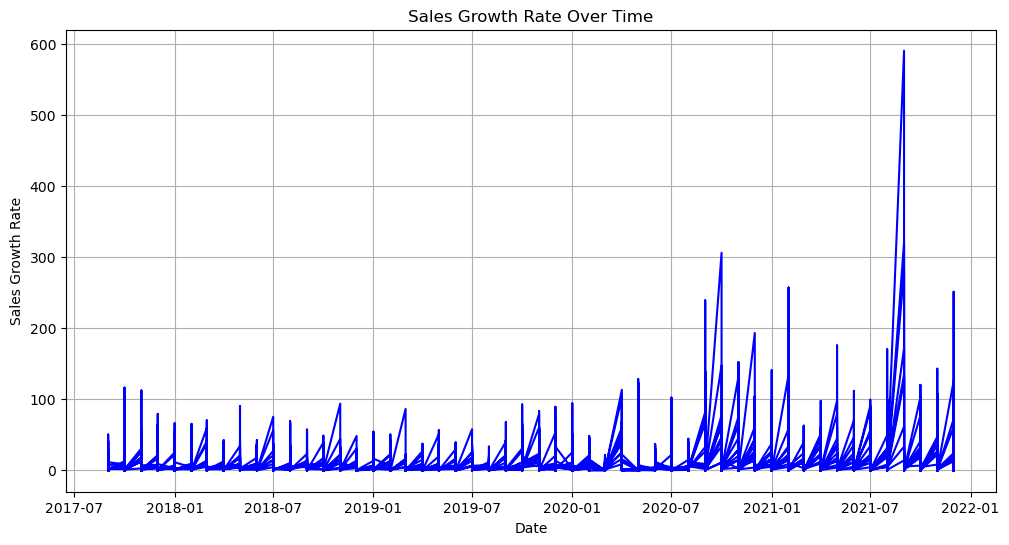

In [12]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot the sales growth rate
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales_growth_rate'], linestyle='-', color='b')
plt.title('Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Growth Rate')
plt.grid(True)
plt.show()

The provided plot shows the sales growth rate over time. Here are some observations and possible interpretations:

1. **Increasing Volatility**: There is a noticeable increase in the volatility of the sales growth rate over time, particularly after mid-2020. This could indicate market or seasonal fluctuations, changes in demand, or other external factors affecting sales.

2. **Significant Spikes**: There are significant spikes in sales growth, especially in mid-2021. These spikes could be due to specific promotional events, new product launches, or other significant business activities that led to a temporary increase in sales.

3. **Initial Stability**: The sales growth rate appears relatively stable from mid-2017 to mid-2020, with occasional smaller spikes. This period might have been characterized by more predictable market conditions or steady demand.

4. **Post-2020 Trends**: The increase in volatility post-2020 might be due to disruptions caused by external factors.

## 4. Exploratory Data Analysis (EDA)

### 4.1 Total sales, average sales, and sales distribution.

In [13]:

query = """
WITH sales_data AS (
    SELECT 
        fsm.product_code,
        dp.product,
        (fsm.sold_quantity * fg.gross_price) AS sales_amount
    FROM 
        fact_sales_monthly AS fsm
    JOIN 
        fact_gross_price AS fg
    ON 
        fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
    JOIN 
        dim_product AS dp
    ON 
        fsm.product_code = dp.product_code
)

SELECT 
    sd.product_code,
    sd.product,
    SUM(sd.sales_amount) AS total_sales,
    AVG(sd.sales_amount) AS average_sales,
    COUNT(sd.sales_amount) AS number_of_sales
FROM 
    sales_data AS sd
GROUP BY 
    sd.product_code, sd.product
ORDER BY 
    total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
sales_metrics = pd.read_sql_query(query, con)

# Display the first few rows of the DataFrame
sales_metrics.head()


,product_code,product,total_sales,average_sales,number_of_sales
0,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,9.028655e+06,1571.020468,5747
1,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,8.875082e+06,1544.835836,5745
2,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,8.603684e+06,1295.150448,6643
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,8.513646e+06,1283.141857,6635
4,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,8.100223e+06,1875.920140,4318


### 4.2 Identify top-selling products overall and by category.

In [14]:
# Query for top-selling products overall
query_top_selling_overall = """
SELECT 
    dp.product_code,
    dp.product,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dp.product_code, dp.product
ORDER BY 
    total_sales DESC
LIMIT 10;
"""

# Execute the query and load the results into a DataFrame
top_selling_overall = pd.read_sql_query(query_top_selling_overall, con)

# Display the first few rows of each DataFrame
print("Top-Selling Products Overall:")
top_selling_overall.head()


Top-Selling Products Overall:


,product_code,product,total_sales
0,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,9.028655e+06
1,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,8.875082e+06
2,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,8.603684e+06
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,8.513646e+06
4,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,8.100223e+06


In [15]:
# Query for top-selling products by category
query_top_selling_by_category = """
SELECT 
    dp.category,
    dp.product_code,
    dp.product,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dp.category, dp.product_code, dp.product
ORDER BY 
    dp.category, total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
top_selling_by_category = pd.read_sql_query(query_top_selling_by_category, con)


print("Top-Selling Products by Category:")
top_selling_by_category.head()

Top-Selling Products by Category:


,category,product_code,product,total_sales
0,Graphic Card,A0418150103,AQ Mforce Gen X,7.887871e+06
1,Graphic Card,A0418150102,AQ Mforce Gen X,1.689715e+06
2,Graphic Card,A0418150101,AQ Mforce Gen X,1.602320e+06
3,Graphic Card,A0418150104,AQ Mforce Gen X,9.196687e+05
4,Internal HDD,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,9.028655e+06


### 4.3 Sales trends over time (monthly, quarterly, yearly).

In [16]:
# Query for monthly sales trends
query_monthly_sales = """
SELECT 
    strftime('%Y-%m', fsm.date) AS month,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
GROUP BY 
    month
ORDER BY 
    month;
"""

# Execute the query and load the results into a DataFrame
monthly_sales = pd.read_sql_query(query_monthly_sales, con)

# Display the first few rows of each DataFrame
print("Monthly Sales Trends:")
monthly_sales.head()


Monthly Sales Trends:


,month,total_sales
0,2017-09,203560.7803
1,2017-10,264533.7946
2,2017-11,375191.4062
3,2017-12,385598.6583
4,2018-01,208699.9808


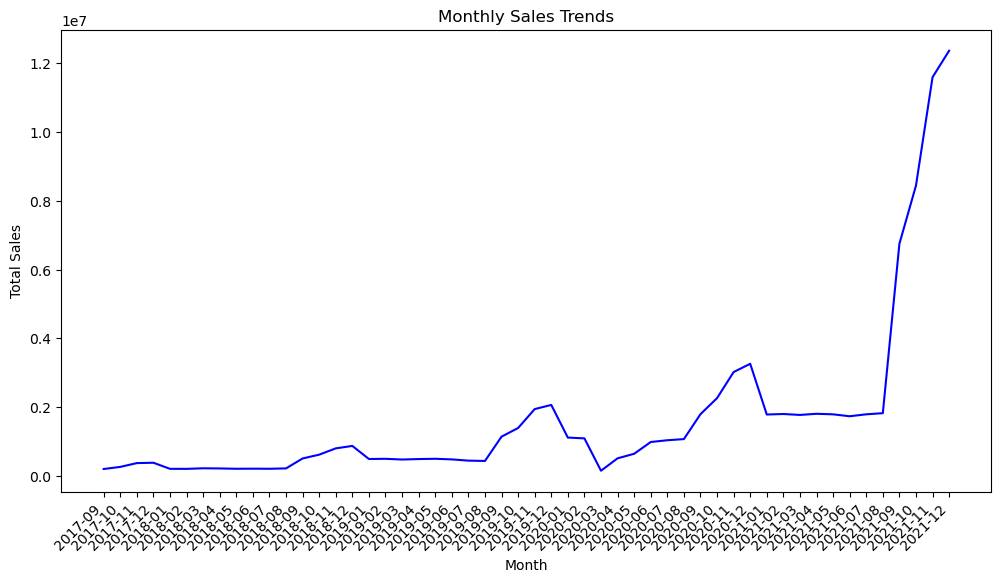

In [17]:
# Plot Monthly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['total_sales'], linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

The analysis of monthly sales trends, as visualized in the provided plot, reveals a consistent growth pattern with a dramatic increase in sales towards the end of 2020 and into 2021. Here is a detailed summary based on the visualization:

1. **Consistent Growth**: The company has been experiencing steady growth in sales over the observed period, with notable monthly fluctuations that indicate possible seasonal trends or the impact of specific sales campaigns.

2. **Significant Spike from 2020 to 2021**: The most substantial growth is observed at the end of 2020 and continues into 2021. This suggests a period of extraordinary performance, possibly due to successful product launches, effective marketing strategies, or external factors.

In [18]:
# Query for quarterly sales trends
query_quarterly_sales = """
SELECT 
    strftime('%Y', fsm.date) AS year,
    (CAST(strftime('%m', fsm.date) AS INTEGER) + 2) / 3 AS quarter,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
GROUP BY 
    year, quarter
ORDER BY 
    year, quarter;
"""

# Execute the query and load the results into a DataFrame
quarterly_sales = pd.read_sql_query(query_quarterly_sales, con)

print("Quarterly Sales Trends:")
quarterly_sales.head()

Quarterly Sales Trends:


,year,quarter,total_sales
0,2017,3,2.035608e+05
1,2017,4,1.025324e+06
2,2018,1,6.405315e+05
3,2018,2,6.432759e+05
4,2018,3,9.408958e+05


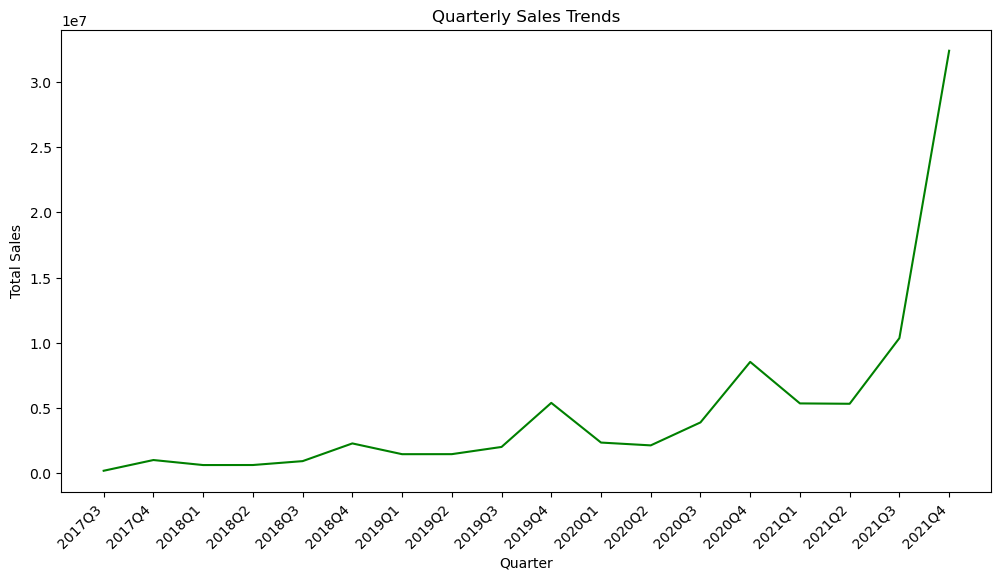

In [19]:
# Plot Quarterly Sales Trends
plt.figure(figsize=(12, 6))
quarters = quarterly_sales['year'] + 'Q' + quarterly_sales['quarter'].astype(str)
plt.plot(quarters, quarterly_sales['total_sales'], linestyle='-', color='g')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

The analysis of quarterly sales trends, as visualized in the provided plot, reveals a steady increase in sales with a pronounced spike in the last quarter of 2021. Here's a detailed summary based on the visualization:

1. **Consistent Growth**: The company has experienced a steady increase in sales across the quarters from 2017 to 2021. The growth trajectory is evident, with occasional fluctuations indicating possible seasonal trends or the impact of specific sales campaigns.

2. **Significant Spike in Q4 2021**: The most substantial growth is observed in Q4 2021. This quarter saw a dramatic rise in sales, suggesting a period of extraordinary performance, likely due to successful product launches, effective marketing strategies, or changes in market conditions.

In [20]:
# Query for yearly sales trends
query_yearly_sales = """
SELECT 
    strftime('%Y', fsm.date) AS year,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
GROUP BY 
    year
ORDER BY 
    year;
"""

# Execute the query and load the results into a DataFrame
yearly_sales = pd.read_sql_query(query_yearly_sales, con)

print("Yearly Sales Trends:")
yearly_sales.head()

Yearly Sales Trends:


,year,total_sales
0,2017,1.228885e+06
1,2018,4.523042e+06
2,2019,1.038248e+07
3,2020,1.696592e+07
4,2021,5.345558e+07


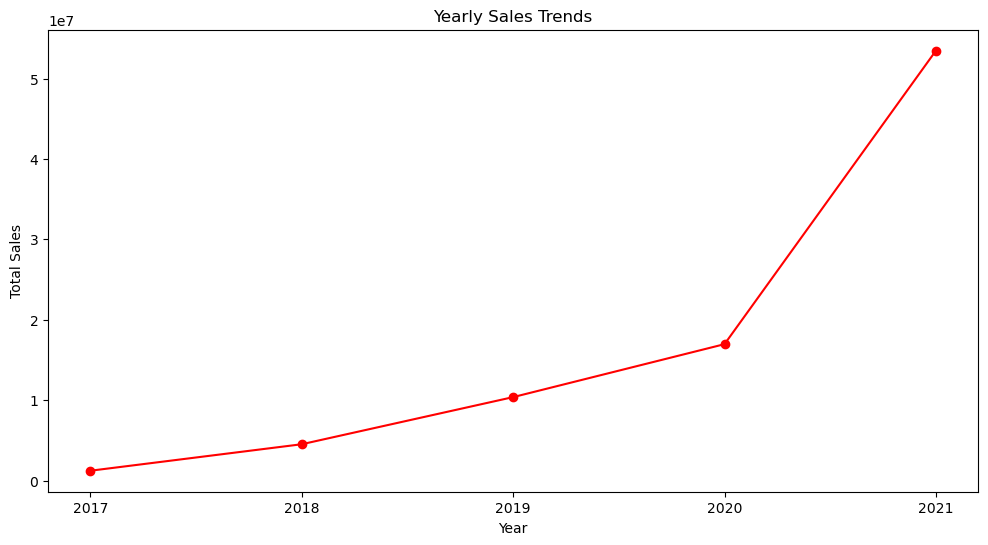

In [21]:
# Plot Yearly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'], yearly_sales['total_sales'], marker='o', linestyle='-', color='r')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

The analysis of yearly sales trends, as visualized in the provided plot, reveals a steady increase in sales with a dramatic spike in 2021. Here's a detailed summary based on the visualization:

1. **Consistent Growth**: The company has experienced a consistent increase in sales from 2017 to 2021. Each year shows a higher total sales figure compared to the previous year, indicating a robust growth trajectory.

2. **Significant Spike in 2021**: The most substantial growth is observed in 2021, where total sales more than doubled compared to 2020. This dramatic increase suggests a period of extraordinary performance, likely driven by successful product launches, effective marketing strategies, or favorable market conditions.

### 4.4 Compare sales trends across different markets/regions

To compare sales trends across different markets or regions, we need to aggregate sales data by market/region and time period (monthly, quarterly, yearly).

In [22]:
# Query for monthly sales trends by region
query_monthly_sales_by_region = """
SELECT 
    strftime('%Y-%m', fsm.date) AS month,
    dc.region,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_customer AS dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    month, dc.region
ORDER BY 
    month, dc.region;
"""

# Execute the query and load the results into a DataFrame
monthly_sales_by_region = pd.read_sql_query(query_monthly_sales_by_region, con)

print("Monthly Sales Trends by Region:")
monthly_sales_by_region.head()

Monthly Sales Trends by Region:


,month,region,total_sales
0,2017-09,APAC,147534.4559
1,2017-09,EU,12575.1827
2,2017-09,LATAM,1219.7959
3,2017-09,NA,42231.3458
4,2017-10,APAC,193219.0564


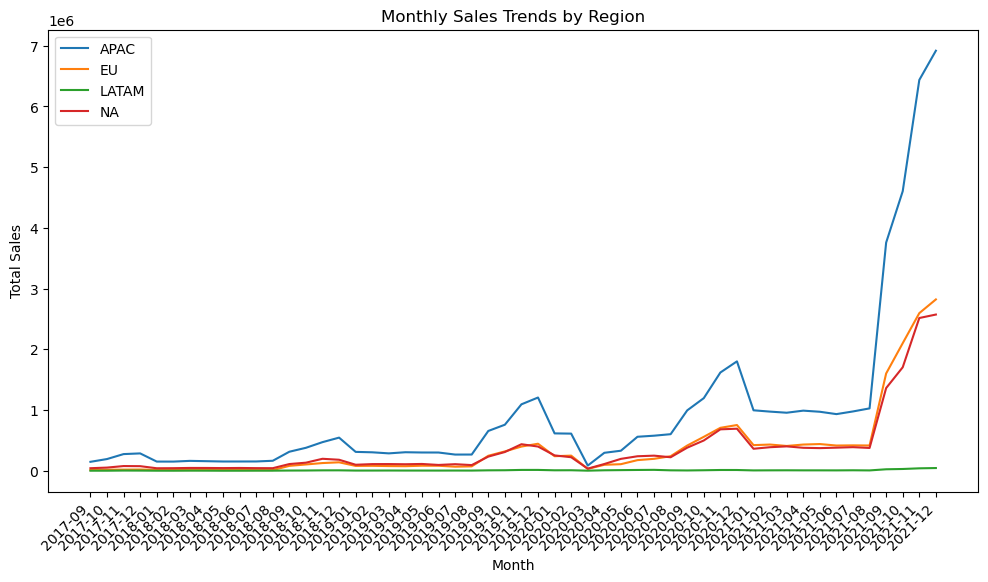

In [23]:
# Plot Monthly Sales Trends by Region
plt.figure(figsize=(12, 6))
for region in monthly_sales_by_region['region'].unique():
    region_data = monthly_sales_by_region[monthly_sales_by_region['region'] == region]
    plt.plot(region_data['month'], region_data['total_sales'], linestyle='-', label=region)
plt.title('Monthly Sales Trends by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


The analysis of monthly sales trends by region, as visualized in the provided plot, reveals distinct growth patterns for different regions. Here's a detailed summary based on the visualization:

1. **APAC Region**:
   - The APAC (Asia-Pacific) region shows the most significant growth in sales.
   - From January 2019 to December 2021, there is a steady increase, with a dramatic spike starting around mid-2021.
   - This region leads in total sales compared to other regions, especially evident in the sharp increase towards the end of 2021.

2. **NA Region**:
   - The NA (North America) region also shows substantial growth.
   - The sales trend indicates a consistent increase over the months, with a notable rise starting around mid-2021, similar to the APAC region.

3. **EU Region**:
   - The EU (Europe) region displays moderate growth.
   - There is a steady increase in sales, particularly noticeable from mid-2020 onwards.

4. **LATAM Region**:
   - The LATAM (Latin America) region shows minimal growth compared to other regions.
   - Sales remain relatively flat from January 2019 to December 2021, with a slight increase in the later months.

In [24]:
# Query for quarterly sales trends by region
query_quarterly_sales_by_region = """
SELECT 
    strftime('%Y', fsm.date) AS year,
    (CAST(strftime('%m', fsm.date) AS INTEGER) + 2) / 3 AS quarter,
    dc.region,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_customer AS dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    year, quarter, dc.region
ORDER BY 
    year, quarter, dc.region;
"""

# Execute the query and load the results into a DataFrame
quarterly_sales_by_region = pd.read_sql_query(query_quarterly_sales_by_region, con)

print("Quarterly Sales Trends by Region:")
quarterly_sales_by_region.head()

Quarterly Sales Trends by Region:


,year,quarter,region,total_sales
0,2017,3,APAC,147534.4559
1,2017,3,EU,12575.1827
2,2017,3,LATAM,1219.7959
3,2017,3,NA,42231.3458
4,2017,4,APAC,754191.3435


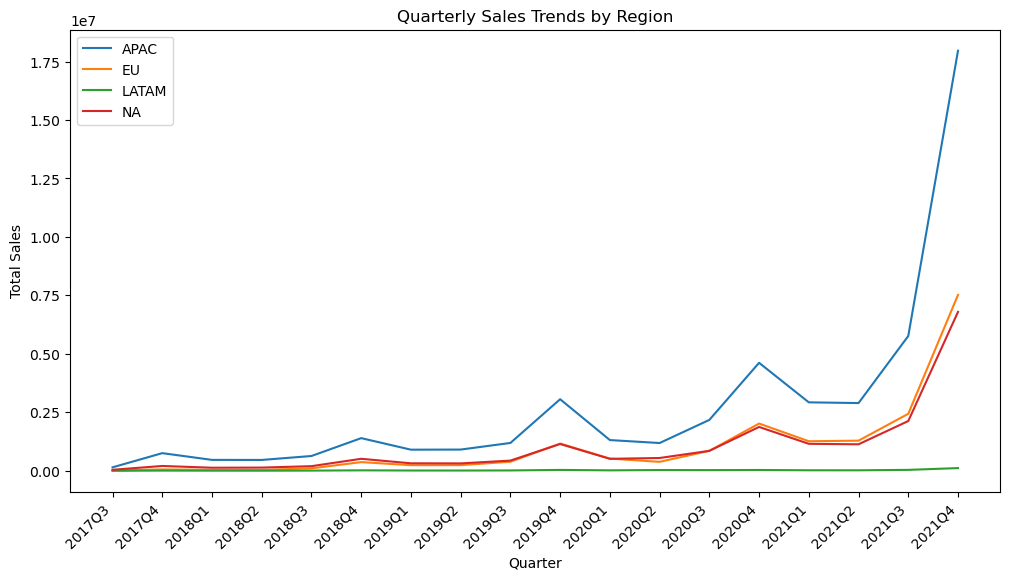

In [25]:
# Plot Quarterly Sales Trends by Region
plt.figure(figsize=(12, 6))
for region in quarterly_sales_by_region['region'].unique():
    region_data = quarterly_sales_by_region[quarterly_sales_by_region['region'] == region]
    quarters = region_data['year'] + 'Q' + region_data['quarter'].astype(str)
    plt.plot(quarters, region_data['total_sales'], linestyle='-', label=region)
plt.title('Quarterly Sales Trends by Region')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

The analysis of quarterly sales trends by region, as visualized in the provided plot, reveals distinct growth patterns for different regions. Here's a detailed summary based on the visualization:

1. **APAC Region**:
   - The APAC (Asia-Pacific) region shows the most significant growth in sales.
   - From Q3 2017 to Q4 2021, there is a steady increase, with a dramatic spike in Q4 2021.
   - This region clearly leads in total sales compared to other regions, especially evident in the sharp increase at the end of 2021.

2. **NA Region**:
   - The NA (North America) region also shows substantial growth.
   - The sales trend indicates a consistent increase over the quarters, with a notable rise in Q4 2021.

3. **EU Region**:
   - The EU (Europe) region displays moderate growth.
   - There is a steady increase in sales, particularly noticeable from 2020 onwards.

4. **LATAM Region**:
   - The LATAM (Latin America) region shows minimal growth compared to other regions.
   - Sales remain relatively flat from Q3 2017 to Q4 2021, with a slight increase in the later quarters.

In [26]:
# Query for yearly sales trends by region
query_yearly_sales_by_region = """
SELECT 
    strftime('%Y', fsm.date) AS year,
    dc.region,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_customer AS dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    year, dc.region
ORDER BY 
    year, dc.region;
"""

# Execute the query and load the results into a DataFrame
yearly_sales_by_region = pd.read_sql_query(query_yearly_sales_by_region, con)

print("Yearly Sales Trends by Region:")
yearly_sales_by_region.head()

Yearly Sales Trends by Region:


,year,region,total_sales
0,2017,APAC,9.017258e+05
1,2017,EU,6.984126e+04
2,2017,LATAM,8.974286e+03
3,2017,NA,2.483433e+05
4,2018,APAC,2.957763e+06


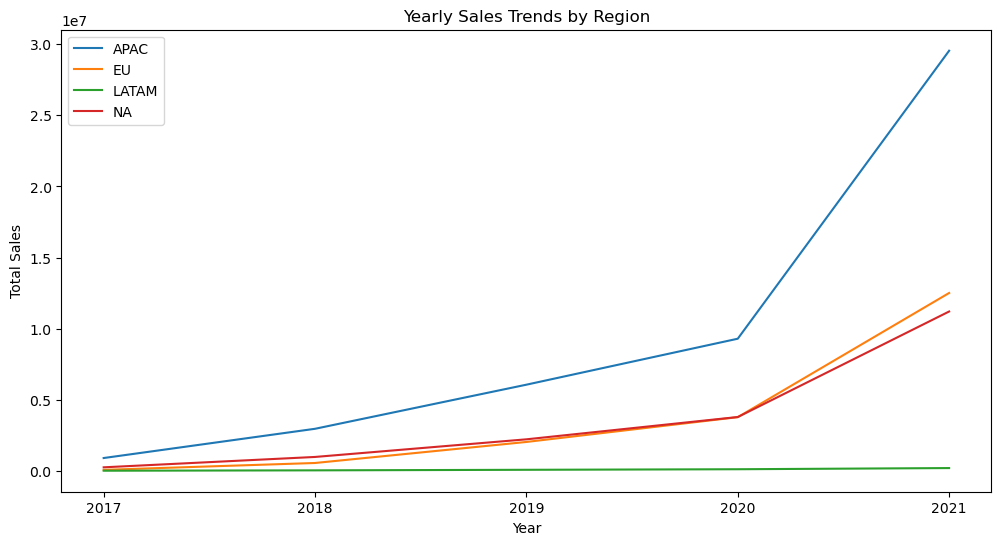

In [27]:
# Plot Yearly Sales Trends by Region
plt.figure(figsize=(12, 6))
for region in yearly_sales_by_region['region'].unique():
    region_data = yearly_sales_by_region[yearly_sales_by_region['region'] == region]
    plt.plot(region_data['year'], region_data['total_sales'], linestyle='-', label=region)
plt.title('Yearly Sales Trends by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

The analysis of yearly sales trends by region, as visualized in the provided plot, reveals distinct growth patterns for different regions. Here's a detailed summary based on the visualization:

1. **APAC Region**:
   - The APAC (Asia-Pacific) region shows the most significant growth in sales.
   - From 2017 to 2021, there is a steady increase, with a dramatic spike in 2021.
   - This region clearly leads in total sales compared to other regions.

2. **NA Region**:
   - The NA (North America) region also shows substantial growth.
   - The sales trend indicates a consistent increase over the years, with a notable rise in 2021.

3. **EU Region**:
   - The EU (Europe) region displays moderate growth.
   - There is a steady increase in sales, particularly noticeable from 2020 to 2021.

4. **LATAM Region**:
   - The LATAM (Latin America) region shows minimal growth compared to other regions.
   - Sales remain relatively flat from 2017 to 2021, with a slight increase in the later years.

- **APAC and NA Lead in Sales**: The APAC and NA regions are leading in sales, with APAC showing the highest growth. This indicates strong market demand and successful business strategies in these regions.
- **EU and LATAM Lag Behind**: The EU and LATAM regions have lower sales growth. This might suggest the need for targeted marketing strategies or new product introductions to boost sales in these regions.

### 4.5 Identify top-performing markets

To identify the top-performing markets, we need to analyze the total sales for each market over a specified period.

In [28]:
# SQL query to identify top-performing markets
query_top_performing_markets = """
SELECT 
    dc.market,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_customer AS dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    dc.market
ORDER BY 
    total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
top_performing_markets = pd.read_sql_query(query_top_performing_markets, con)

# Display the first few rows of the DataFrame
top_performing_markets.head()


,market,total_sales
0,India,2.467455e+07
1,USA,1.389045e+07
2,South Korea,7.645632e+06
3,Canada,4.543901e+06
4,Philiphines,4.354125e+06


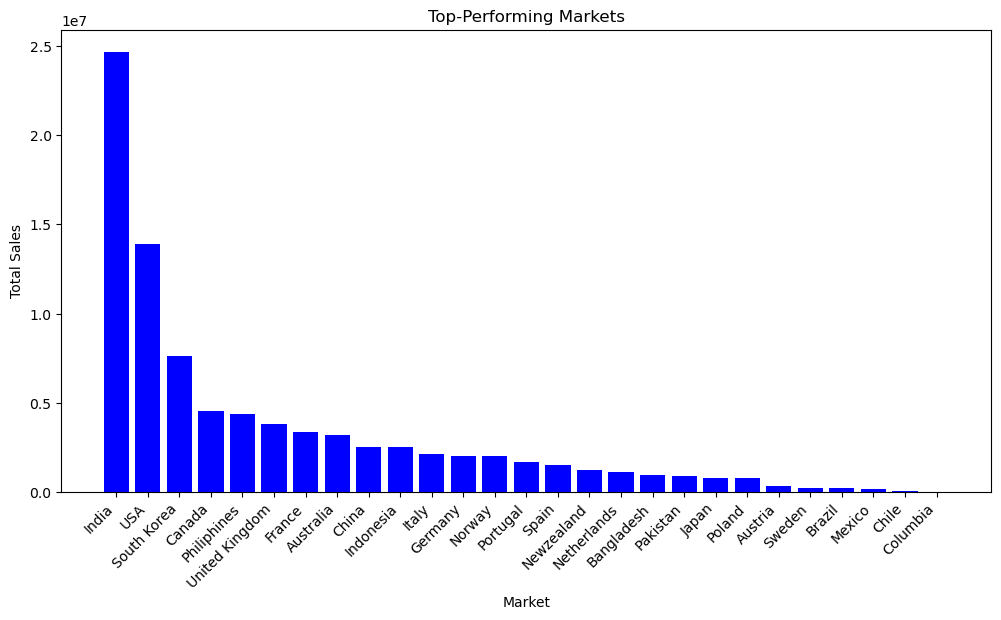

In [29]:
# Plot Top-Performing Markets
plt.figure(figsize=(12, 6))
plt.bar(top_performing_markets['market'], top_performing_markets['total_sales'], color='blue')
plt.title('Top-Performing Markets')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar plot of top-performing markets highlights the significant contributions of various markets to total sales. Here's a detailed summary based on the visualization:

1. **India**:
   - India is the top-performing market, with total sales significantly higher than any other market.
   - This indicates a strong demand and successful business strategies in the Indian market.

2. **USA**:
   - The USA is the second-highest performing market.
   - The total sales in the USA are substantial, though not as high as in India.

3. **South Korea**:
   - South Korea ranks third in terms of total sales.
   - This market also shows strong performance, contributing significantly to overall sales.

4. **Canada, Philippines, United Kingdom**:
   - These markets follow with moderate total sales.
   - They contribute meaningfully to the overall sales, indicating solid market presence and demand.

5. **Other Markets**:
   - France, Australia, China, Indonesia, Italy, Germany, and other markets contribute lower total sales compared to the top three.
   - These markets still represent important regions for sales but may require targeted strategies to boost performance.

### 4.6 Analyze market-specific product preferences

To analyze market-specific product preferences, we need to aggregate sales data by market and product. This will help us understand which products are most popular in each market. Here's how we can do it:

1. **Aggregate Sales by Market and Product**: Calculate the total sales for each product within each market.
2. **Identify Top Products in Each Market**: Identify the top-selling products in each market based on total sales.

In [30]:
# SQL query to analyze market-specific product preferences
query_market_product_preferences = """
SELECT 
    dc.market,
    dp.product,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_customer AS dc ON fsm.customer_code = dc.customer_code
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dc.market, dp.product
ORDER BY 
    dc.market, total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
market_product_preferences = pd.read_sql_query(query_market_product_preferences, con)

# Display the first few rows of the DataFrame
market_product_preferences.head(20)


,market,product,total_sales
0,Australia,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,9.463343e+05
1,Australia,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,9.439490e+05
2,Australia,AQ Zion Saga,8.334679e+05
3,Australia,AQ Mforce Gen X,4.684474e+05
4,Austria,AQ Zion Saga,1.043427e+05
5,Austria,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,1.022542e+05
6,Austria,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,8.026485e+04
7,Austria,AQ Mforce Gen X,2.969353e+04
8,Bangladesh,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,2.876120e+05
9,Bangladesh,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2.643677e+05


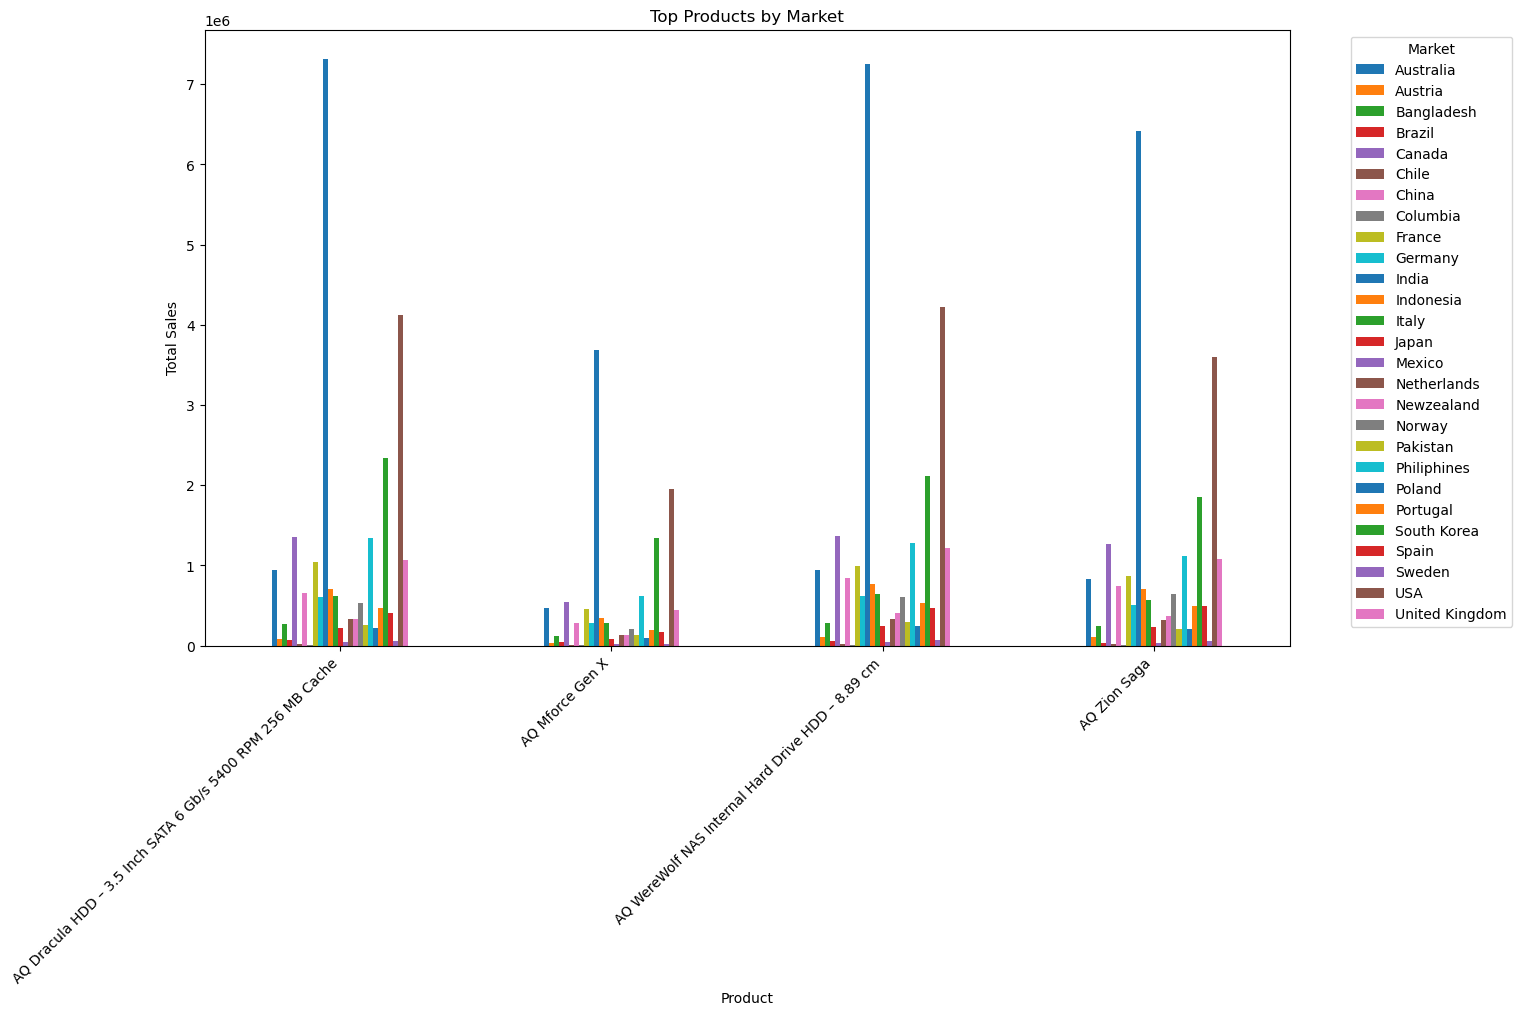

In [31]:
# Select top 5 products for each market
top_products_per_market = market_product_preferences.groupby('market').head(5)

# Pivot the data for plotting
pivot_df = top_products_per_market.pivot(index='product', columns='market', values='total_sales').fillna(0)

# Plot the grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top Products by Market')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The analysis of market-specific product preferences, as visualized in the provided plot, reveals distinct preferences for products across various markets. Here’s a detailed summary based on the visualization:

1. **Product Preferences by Market**:
   - The product **AQ Dracula HDD** shows a significant preference in multiple markets, with especially high sales in India.
   - **AQ Mforce Gen X** is popular in several markets but shows notable sales in markets like the USA.
   - **AQ WereWolf NAS Internal Hard Drive** also demonstrates high sales across various markets, indicating a strong preference.
   - **AQ Zion Saga** is another product with significant sales in several markets.

2. **Market Variations**:
   - Different markets show varied preferences for products. For instance, India and the USA appear to have high sales across multiple products compared to other markets.
   - Some markets like South Korea and Canada also exhibit strong preferences for specific products.

## 5. Advanced Analysis

### 5.1 Sales Drivers: Identify factors driving sales (e.g., product features, pricing, promotions).

To identify factors driving sales, we need to analyze various attributes that might influence sales, such as product features, pricing, and promotions. Here’s a comprehensive approach to identifying these factors:

1. **Product Features**: Analyze how different product attributes (e.g., category, division, segment, variant) impact sales.
2. **Pricing**: Examine the relationship between product prices and sales.
3. **Promotions**: Investigate the effect of promotional activities on sales.

In [32]:
# SQL query for product features
query_product_features = """
SELECT 
    dp.category,
    dp.division,
    dp.segment,
    dp.variant,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dp.category, dp.division, dp.segment, dp.variant
ORDER BY 
    total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
product_features = pd.read_sql_query(query_product_features, con)

print("Product Features:")
product_features.head()


Product Features:


,category,division,segment,variant,total_sales
0,Internal HDD,P & A,Peripherals,Premium,2.414417e+07
1,Internal HDD,P & A,Peripherals,Plus,2.120319e+07
2,Internal HDD,P & A,Peripherals,Standard,2.050529e+07
3,Internal HDD,P & A,Peripherals,Premium Plus,8.603684e+06
4,Graphic Card,P & A,Peripherals,Standard 3,7.887871e+06


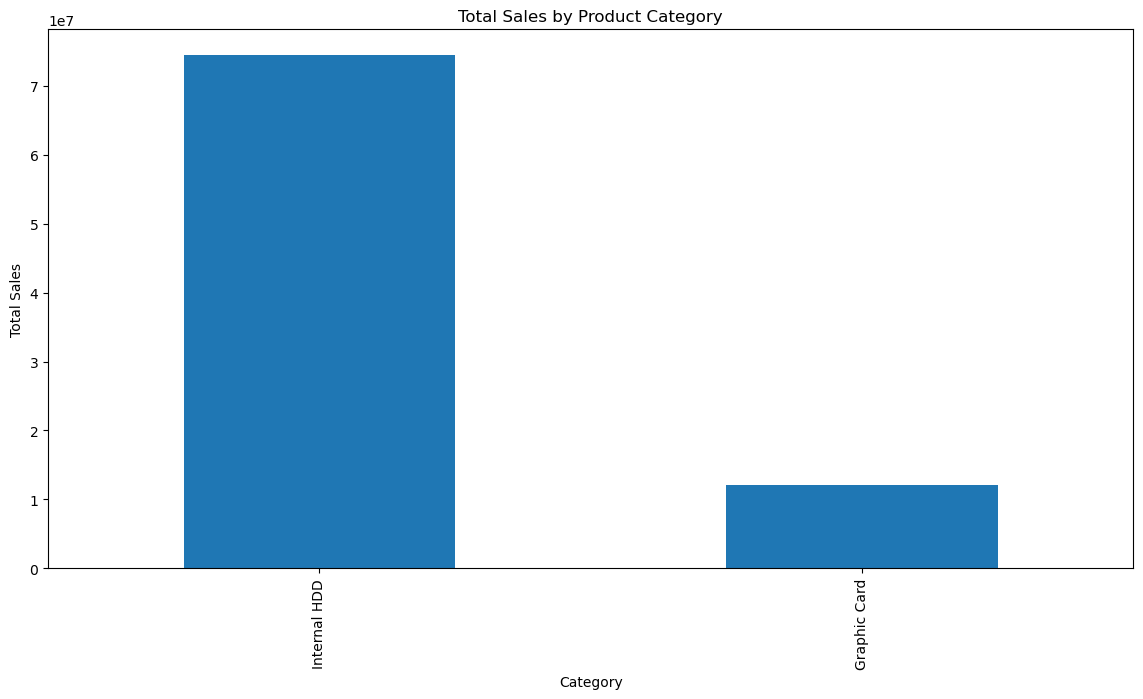

In [33]:
# Product Features Analysis
plt.figure(figsize=(14, 7))
product_features.groupby('category')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

The analysis of sales by product category, as visualized in the provided plot, reveals significant insights into the performance of different product categories. Here’s a detailed summary based on the visualization:

1. **Internal HDD**:
   - The category **Internal HDD** (Hard Disk Drives) has the highest total sales by a substantial margin.
   - This indicates a strong market demand and successful sales performance for internal HDD products.

2. **Graphic Card**:
   - The category **Graphic Card** also shows considerable sales but is significantly lower compared to Internal HDD.
   - This category still contributes meaningfully to overall sales, indicating a healthy market presence.

- **Dominance of Internal HDD**: The Internal HDD category dominates sales, suggesting that it is a key driver of revenue for the company. This indicates a strong market preference for internal HDD products.
- **Potential for Growth in Graphic Cards**: Although Graphic Card sales are lower, they still represent a significant portion of total sales. There is potential for growth in this category with targeted marketing and product improvements.

In [34]:
# SQL query for pricing
query_pricing = """
SELECT 
    dp.product,
    fg.gross_price,
    SUM(fsm.sold_quantity) AS total_quantity_sold,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dp.product, fg.gross_price
ORDER BY 
    total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
pricing = pd.read_sql_query(query_pricing, con)

print("Pricing:")
pricing.head()

Pricing:


,product,gross_price,total_quantity_sold,total_sales
0,AQ Zion Saga,29.5075,168127,4.961007e+06
1,AQ Zion Saga,30.3060,159123,4.822382e+06
2,AQ Mforce Gen X,21.0913,218083,4.599654e+06
3,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,25.0286,172000,4.304919e+06
4,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,25.7806,165516,4.267102e+06


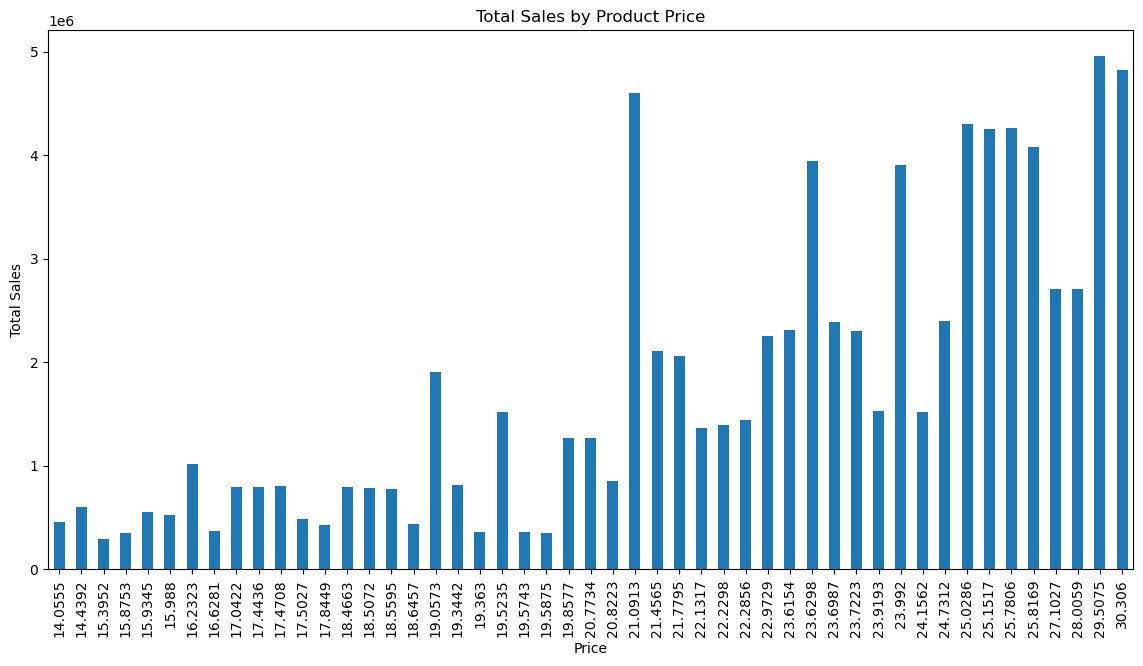

In [35]:
# Pricing Analysis
plt.figure(figsize=(14, 7))
pricing.groupby('gross_price')['total_sales'].sum().plot(kind='bar')
plt.title('Total Sales by Product Price')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

The analysis of sales by product price, as visualized in the provided plot, reveals significant insights into the relationship between product pricing and total sales. Here’s a detailed summary based on the visualization:

1. **Price Range Performance**:
   - Products in the price range of approximately $20 to $25 tend to have higher total sales.
   - There are notable peaks at specific price points such as $19.0573, $23.6298, and $30.306, indicating strong sales performance for products priced at these levels.

2. **Price Sensitivity**:
   - Sales tend to be lower at the extreme low and high ends of the price spectrum.
   - This suggests that there is an optimal price range where products perform best, likely due to perceived value and affordability.

### 5.2 Product Lifecycle: Analyze the lifecycle of products to understand their popularity phases

To analyze the lifecycle of products and understand their popularity phases, we need to examine the sales trends over time for individual products. This involves:

1. **Sales Trends Over Time**: Analyzing monthly sales trends for each product.
2. **Phases of Product Lifecycle**: Identifying introduction, growth, maturity, and decline phases based on sales data.

In [36]:
# SQL query to gather monthly sales data for each product
query_product_lifecycle = """
SELECT 
    dp.product,
    strftime('%Y-%m', fsm.date) AS month,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
JOIN 
    dim_product AS dp ON fsm.product_code = dp.product_code
GROUP BY 
    dp.product, month
ORDER BY 
    dp.product, month;
"""

# Execute the query and load the results into a DataFrame
product_lifecycle = pd.read_sql_query(query_product_lifecycle, con)

# Display the first few rows of the DataFrame
product_lifecycle.head()


,product,month,total_sales
0,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-09,96766.5191
1,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-10,119582.5550
2,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-11,178065.6140
3,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2017-12,176992.1172
4,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,2018-01,96970.7718


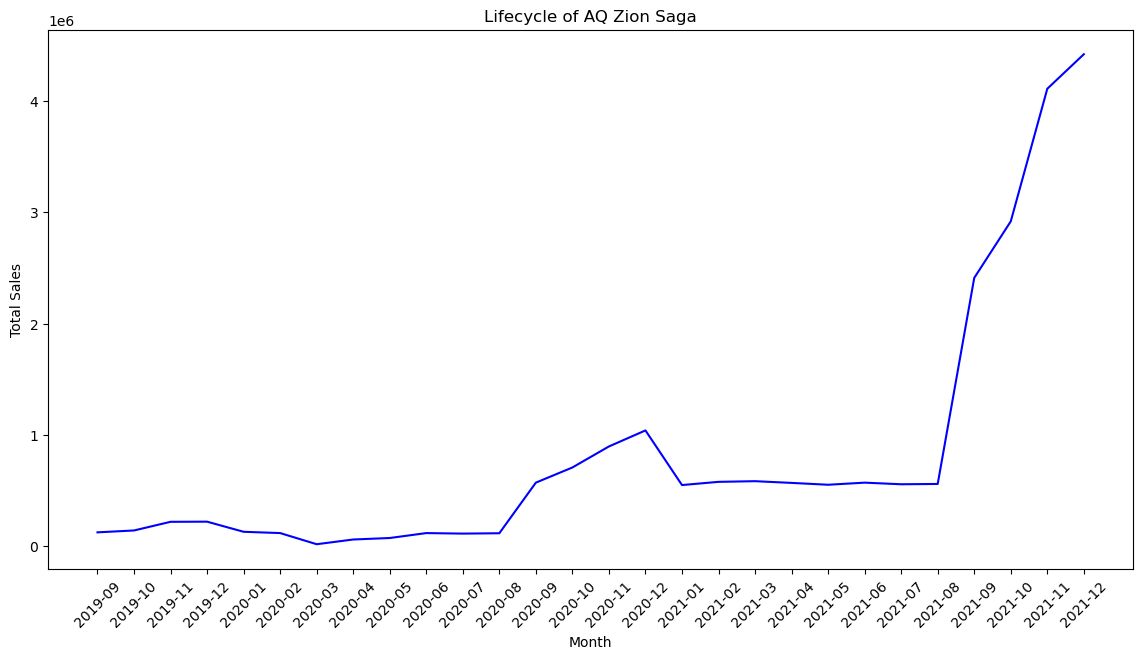

In [37]:
# Define a function to plot the lifecycle of a product
def plot_product_lifecycle(product_name):
    product_data = product_lifecycle[product_lifecycle['product'] == product_name]
    plt.figure(figsize=(14, 7))
    plt.plot(product_data['month'], product_data['total_sales'], linestyle='-', color='b')
    plt.title(f'Lifecycle of {product_name}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

# Example: Plot the lifecycle of a specific product
plot_product_lifecycle('AQ Zion Saga')

The lifecycle of the product "AQ Zion Saga" can be divided into several distinct phases based on the sales trends:

1. **Introduction Phase (Sep 2019 - Feb 2020)**:
   - The product was introduced to the market around September 2019.
   - Sales were relatively low and stable during this initial period.

2. **Growth Phase (Mar 2020 - Nov 2020)**:
   - Starting around March 2020, sales began to increase, indicating that the product started gaining market acceptance.
   - There is a clear upward trend in sales, marking the growth phase of the product.

3. **Maturity Phase (Dec 2020 - Jul 2021)**:
   - Sales stabilized and remained relatively constant from December 2020 to July 2021.
   - This indicates that the product had reached its maturity phase, where market saturation and peak sales levels were achieved.

4. **Renewed Growth Phase (Aug 2021 - Dec 2021)**:
   - From August 2021, there is a sharp increase in sales, suggesting a renewed interest or effective promotional activities.
   - This renewed growth could be due to factors such as marketing campaigns, seasonal demand, or product improvements.


### 5.3 Seasonality: Detect seasonal trends and their impact on sales


To detect seasonal trends and their impact on sales, we need to analyze the sales data over time and identify any repeating patterns that occur at regular intervals, such as monthly or quarterly. Here's a step-by-step approach to detect and analyze seasonality:

1. **Aggregate Sales Data**: Aggregate the sales data by month to observe the seasonal patterns.
2. **Visualize Seasonality**: Create visualizations to identify and analyze seasonal trends.
3. **Statistical Analysis**: Use statistical methods to confirm the presence of seasonality.

In [38]:
# SQL query to aggregate sales data by month
query_seasonality = """
SELECT 
    strftime('%Y-%m', fsm.date) AS month,
    SUM(fsm.sold_quantity * fg.gross_price) AS total_sales
FROM 
    fact_sales_monthly AS fsm
JOIN 
    fact_gross_price AS fg ON fsm.product_code = fg.product_code AND fsm.fiscal_year = fg.fiscal_year
GROUP BY 
    month
ORDER BY 
    month;
"""

# Execute the query and load the results into a DataFrame
seasonality_data = pd.read_sql_query(query_seasonality, con)

# Display the first few rows of the DataFrame
seasonality_data.head()


,month,total_sales
0,2017-09,203560.7803
1,2017-10,264533.7946
2,2017-11,375191.4062
3,2017-12,385598.6583
4,2018-01,208699.9808


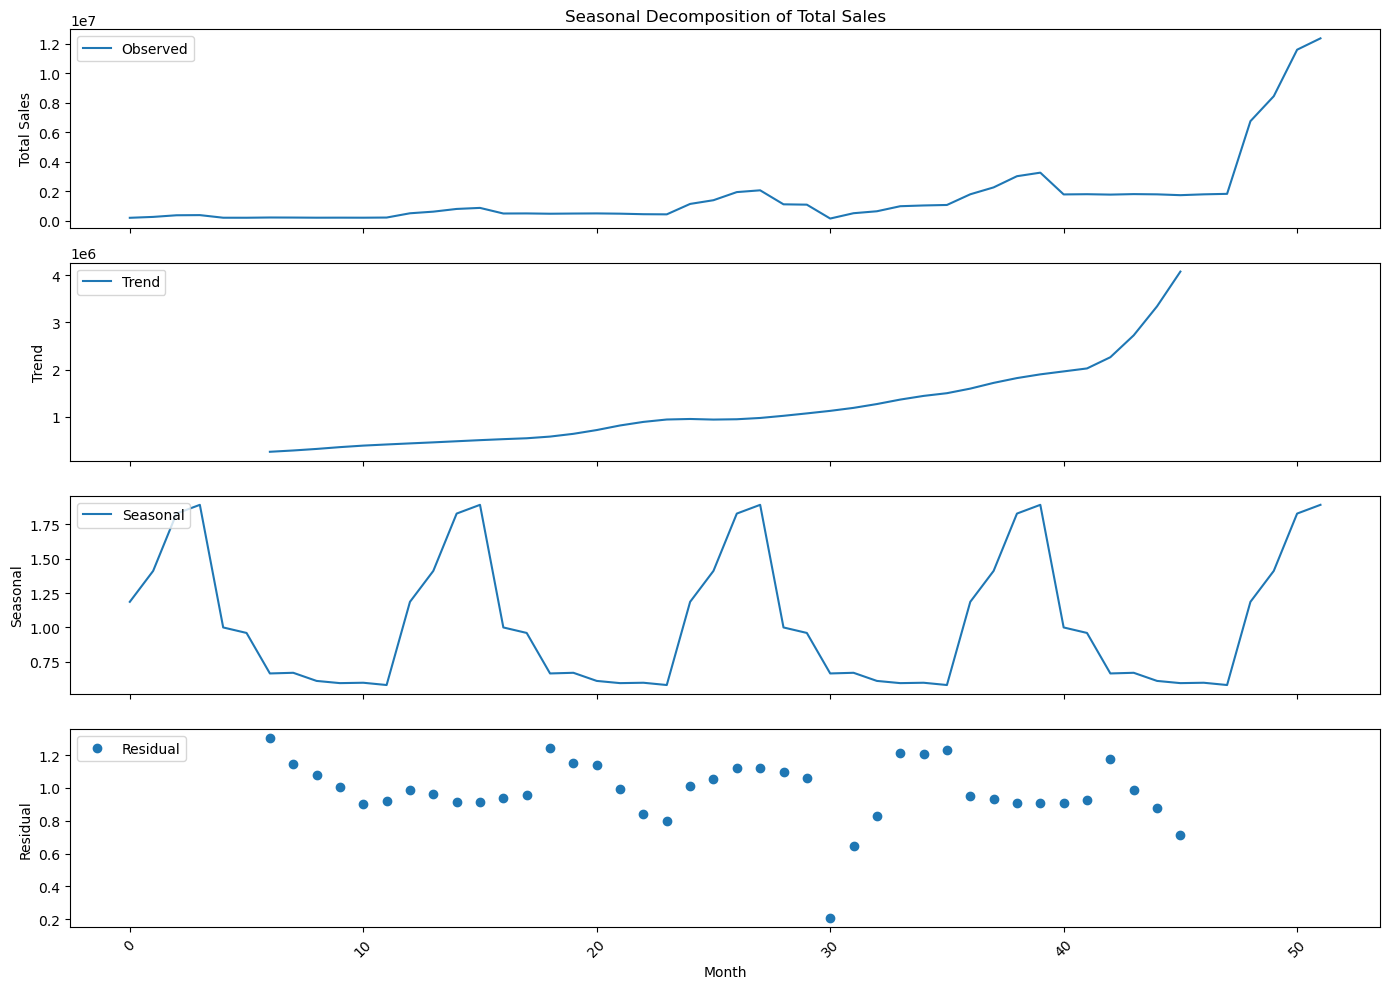

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe seasonality, trend, and residuals
result = seasonal_decompose(seasonality_data['total_sales'], model='multiplicative', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot observed data
ax1.plot(result.observed, label='Observed')
ax1.set_ylabel('Total Sales')
ax1.set_title('Seasonal Decomposition of Total Sales')
ax1.legend(loc='upper left')

# Plot trend data
ax2.plot(result.trend, label='Trend')
ax2.set_ylabel('Trend')
ax2.legend(loc='upper left')

# Plot seasonal data
ax3.plot(result.seasonal, label='Seasonal')
ax3.set_ylabel('Seasonal')
ax3.legend(loc='upper left')

# Plot residual data
ax4.plot(result.resid, label='Residual', marker='o', linestyle='none')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Month')
ax4.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The seasonal decomposition charts provide a detailed breakdown of the total sales time series into three components: trend, seasonality, and residuals. Here's what we can observe from each component:

1. **Observed Data**:
   - The observed data represents the total sales over time. 
   - We can see a clear upward trend in sales, especially towards the end of the observed period.
   - There are also noticeable fluctuations, indicating the presence of seasonality.

2. **Trend**:
   - The trend component shows the long-term progression of the sales data.
   - The trend indicates a steady increase in sales over time, with a more pronounced rise in the latter part of the period.
   - This suggests that the overall market demand for the products is growing.

3. **Seasonal**:
   - The seasonal component captures the regular, repeating patterns in the data.
   - We can observe a clear seasonal pattern with peaks and troughs that repeat annually.
   - The peaks occur roughly at the same time each year, indicating that sales are higher during certain months. For instance, the peaks might correspond to high-demand periods such as holiday seasons or back-to-school times.
   - The troughs also occur consistently, indicating lower sales during specific months.

4. **Residual**:
   - The residual component shows the random noise or irregular variations that are not captured by the trend or seasonal components.
   - The residuals appear to be relatively stable, with some fluctuations. This suggests that the majority of the variability in the sales data is explained by the trend and seasonal components.
   - Any large spikes or dips in the residuals might indicate unusual events or outliers that could warrant further investigation.

### 5.4 Customer Preferences: Use customer data to correlate product popularity with customer segments

In [40]:
query_product_popularity = """
SELECT 
    dp.product_code,
    dp.product,
    dc.platform,
    SUM(fsm.sold_quantity) AS total_sold_quantity
FROM 
    fact_sales_monthly fsm
JOIN 
    dim_product dp ON fsm.product_code = dp.product_code
JOIN 
    dim_customer dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    dp.product_code, dp.product, dc.platform
ORDER BY 
    total_sold_quantity DESC;
"""

# Execute the query and load the results into a DataFrame
product_popularity_data = pd.read_sql_query(query_product_popularity, con)

# Display the first few rows of the DataFrame
product_popularity_data.head()

,product_code,product,platform,total_sold_quantity
0,A0418150103,AQ Mforce Gen X,Brick & Mortar,283861
1,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Brick & Mortar,275787
2,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Brick & Mortar,269091
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Brick & Mortar,267574
4,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Brick & Mortar,264044


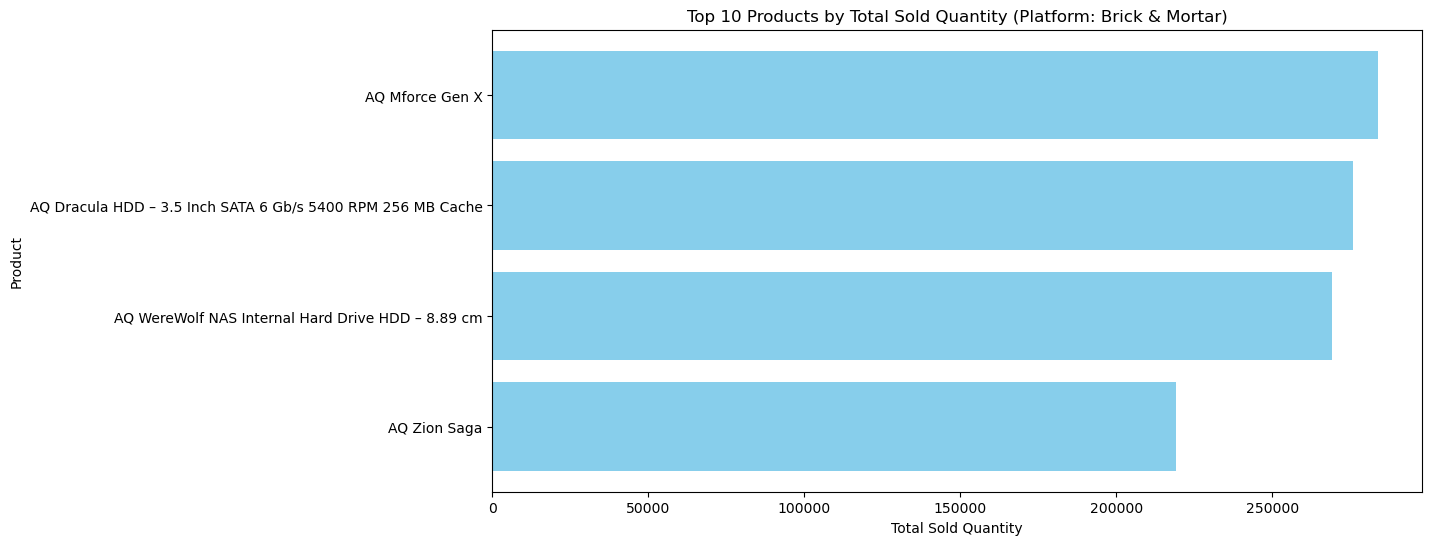

In [41]:
# Visualization: Product Popularity by Platform
plt.figure(figsize=(12, 6))
plt.barh(product_popularity_data['product'][:10], 
         product_popularity_data['total_sold_quantity'][:10], color='skyblue')
plt.xlabel('Total Sold Quantity')
plt.ylabel('Product')
plt.title('Top 10 Products by Total Sold Quantity (Platform: Brick & Mortar)')
plt.gca().invert_yaxis()
plt.show()

In [42]:
query_sales_distribution = """
SELECT 
    dp.product_code,
    dp.product,
    dc.market,
    SUM(fsm.sold_quantity) AS total_sold_quantity
FROM 
    fact_sales_monthly fsm
JOIN 
    dim_product dp ON fsm.product_code = dp.product_code
JOIN 
    dim_customer dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    dp.product_code, dp.product, dc.market
ORDER BY 
    total_sold_quantity DESC;
"""

# Execute the query and load the results into a DataFrame
sales_distribution_data = pd.read_sql_query(query_sales_distribution, con)

# Display the first few rows of the DataFrame
sales_distribution_data.head()

,product_code,product,market,total_sold_quantity
0,A0418150103,AQ Mforce Gen X,India,115233
1,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,India,109809
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,India,109584
3,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,India,106249
4,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,India,105134


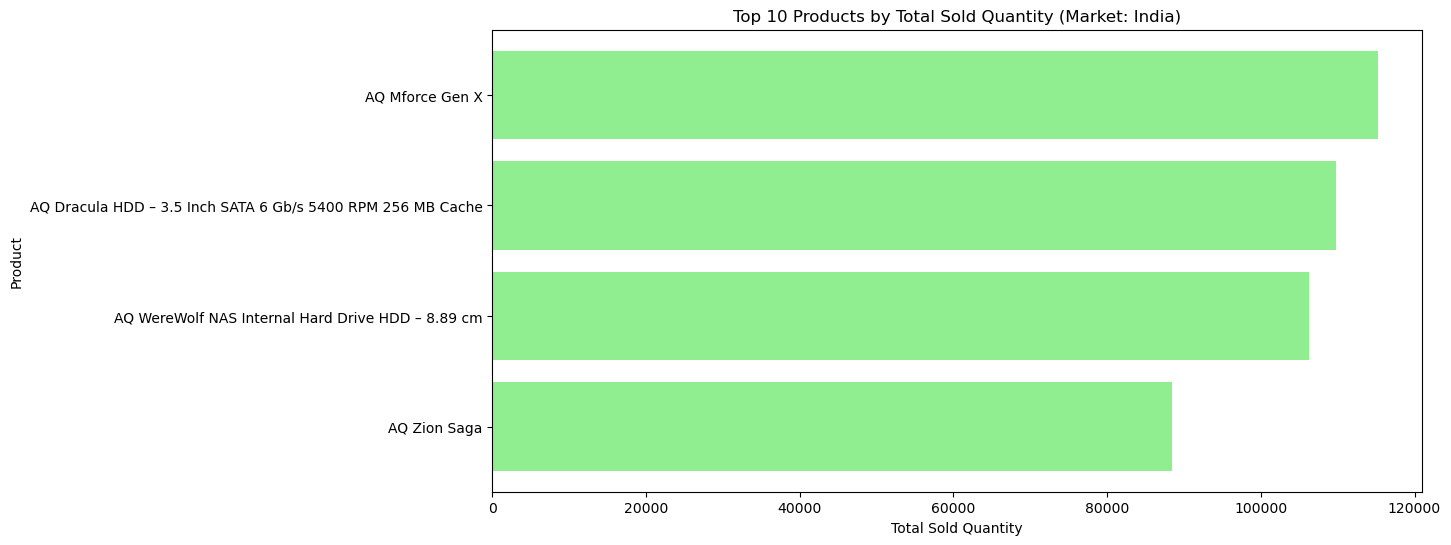

In [43]:
# Visualization: Sales Distribution by Market
plt.figure(figsize=(12, 6))
plt.barh(sales_distribution_data['product'][:10], 
         sales_distribution_data['total_sold_quantity'][:10], color='lightgreen')
plt.xlabel('Total Sold Quantity')
plt.ylabel('Product')
plt.title('Top 10 Products by Total Sold Quantity (Market: India)')
plt.gca().invert_yaxis()
plt.show()

In [44]:
query_channel_effectiveness = """
SELECT 
    dp.product_code,
    dp.product,
    dc.channel,
    SUM(fsm.sold_quantity) AS total_sold_quantity
FROM 
    fact_sales_monthly fsm
JOIN 
    dim_product dp ON fsm.product_code = dp.product_code
JOIN 
    dim_customer dc ON fsm.customer_code = dc.customer_code
GROUP BY 
    dp.product_code, dp.product, dc.channel
ORDER BY 
    total_sold_quantity DESC;
"""

# Execute the query and load the results into a DataFrame
channel_effectiveness_data = pd.read_sql_query(query_channel_effectiveness, con)

# Display the first few rows of the DataFrame
channel_effectiveness_data.head()

,product_code,product,channel,total_sold_quantity
0,A0418150103,AQ Mforce Gen X,Retailer,285625
1,A0118150104,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Retailer,279400
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Retailer,273505
3,A0219150201,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Retailer,270824
4,A0219150202,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Retailer,270189


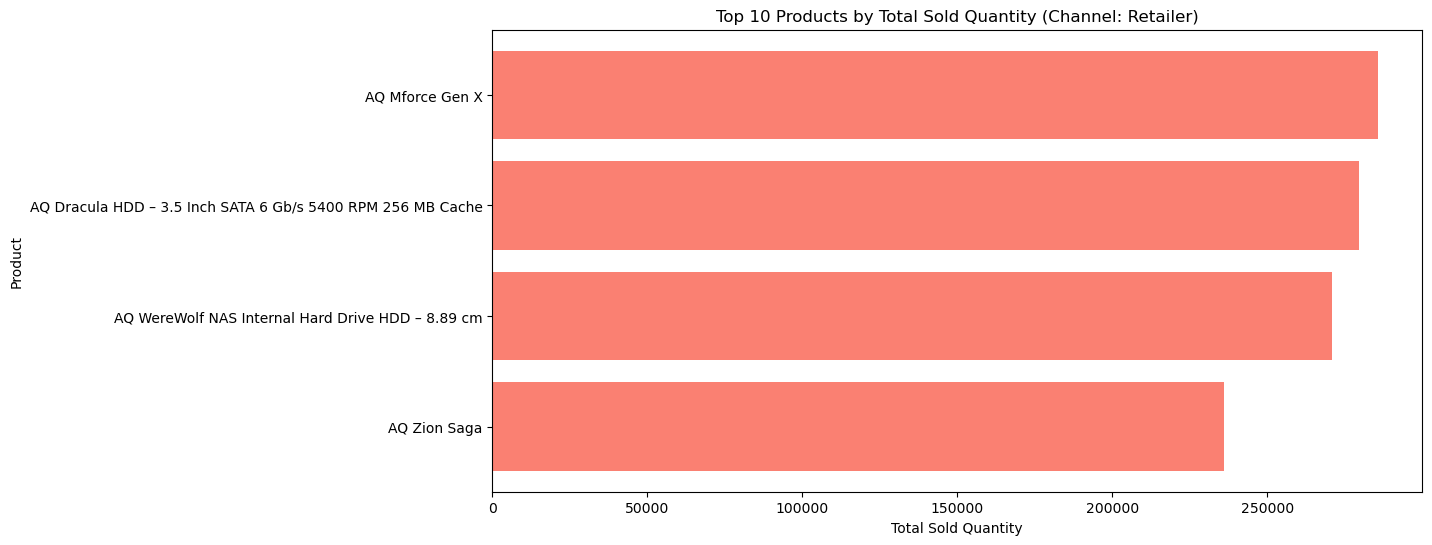

In [45]:
# Visualization: Channel Effectiveness
plt.figure(figsize=(12, 6))
plt.barh(channel_effectiveness_data['product'][:10], 
         channel_effectiveness_data['total_sold_quantity'][:10], color='salmon')
plt.xlabel('Total Sold Quantity')
plt.ylabel('Product')
plt.title('Top 10 Products by Total Sold Quantity (Channel: Retailer)')
plt.gca().invert_yaxis()
plt.show()

1. **Product Popularity by Platform**:
- The AQ Mforce Gen X and various AQ Dracula HDD models are highly popular.
- Sales are significantly higher in the "Brick & Mortar" platform.

2. **Sales Distribution by Market**:
- The Indian market is a dominant contributor to high sales volumes for top products.
- Products like AQ Mforce Gen X and AQ Dracula HDD perform exceptionally well in India.

3. **Channel Effectiveness**:
- The "Retailer" channel is highly effective in driving sales.
- Top products again include AQ Mforce Gen X and AQ Dracula HDD.

## 6. Segmentation and Profiling

### 6.1 Product Segmentation: Group products based on sales performance, categories, and other relevant features.

In [46]:
# SQL query to calculate total sales for each product
product_segmentation = """
SELECT
    dp.product_code,
    dp.division,
    dp.segment,
    dp.category,
    dp.product,
    dp.variant,
    SUM(fsm.sold_quantity) AS total_sales,
    AVG(fsm.sold_quantity) AS avg_sales
FROM
    dim_product dp
JOIN
    fact_sales_monthly fsm ON dp.product_code = fsm.product_code
GROUP BY
    dp.product_code, dp.division, dp.segment, dp.category, dp.product, dp.variant
ORDER BY
    total_sales DESC;
"""

# Execute the query and load the data into a pandas DataFrame
product_segmentation_data = pd.read_sql_query(product_segmentation, con)
product_segmentation_data.head(10)

,product_code,division,segment,category,product,variant,total_sales,avg_sales
0,A0418150103,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,399751,60.632641
1,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus,386569,58.191931
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,380146,57.294047
3,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,378195,65.830287
4,A0219150202,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,370148,64.407169
5,A0220150203,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,327011,75.732052
6,A0320150301,P & A,Peripherals,Internal HDD,AQ Zion Saga,Standard,319568,74.076959
7,A0321150302,P & A,Peripherals,Internal HDD,AQ Zion Saga,Plus,268082,106.890750
8,A0321150303,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,255814,101.999203
9,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,222942,37.126062


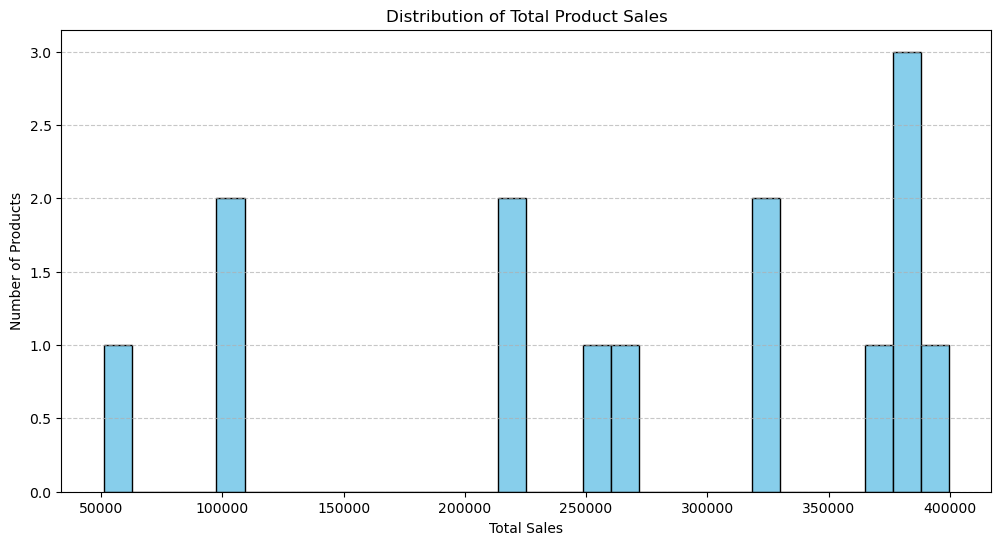

In [47]:
# Plotting the distribution of product sales
plt.figure(figsize=(12, 6))
plt.hist(product_segmentation_data['total_sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Product Sales')
plt.xlabel('Total Sales')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram displays the distribution of total product sales across different products. Here are some key observations and insights from the chart:

1. **Sales Clusters:**
   - The products are clustered at certain sales intervals, with noticeable peaks at around 50,000, 100,000, 200,000, 250,000, 350,000, and 400,000 units.
   - This indicates that there are specific product performance groups where products tend to achieve similar total sales figures.

2. **Frequency of Sales Levels:**
   - The most frequent total sales value appears to be around 400,000 units, with 3 products reaching this level.
   - Other sales intervals such as 100,000, 200,000, 250,000, and 350,000 units also show higher frequencies with 2 products each reaching these levels.

3. **Gap in Sales Intervals:**
   - There are gaps in the histogram where no products fall into certain sales intervals, indicating that products do not have sales figures in these ranges.
   - For instance, there are no products with total sales between 150,000 to 200,000 and 300,000 to 350,000 units.

4. **Sales Distribution Shape:**
   - The distribution shape suggests a pattern where products either perform very well, moderately well, or at specific lower sales levels, with fewer products in between these levels.
   - This pattern might indicate a bifurcation in product performance, possibly influenced by product categories, market demand, or sales strategies.

### 6.2 Customer Segmentation: Segment customers based on purchase behavior and preferences.

In [48]:
# SQL query to calculate Customer Segmentation
customer_segmentation = """
SELECT
    dc.customer_code,
    dc.customer,
    dc.platform,
    dc.channel,
    dc.market,
    dc.sub_zone,
    dc.region,
    SUM(fsm.sold_quantity) AS total_purchases,
    COUNT(fsm.date) AS purchase_frequency,
    AVG(fsm.sold_quantity) AS avg_purchase_value
FROM
    dim_customer dc
JOIN
    fact_sales_monthly fsm ON dc.customer_code = fsm.customer_code
GROUP BY
    dc.customer_code, dc.customer, dc.platform, dc.channel, dc.market, dc.sub_zone, dc.region
ORDER BY
    total_purchases DESC;
"""

# Execute the query and load the data into a pandas DataFrame
customer_segmentation_data = pd.read_sql_query(customer_segmentation, con)
customer_segmentation_data.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region,total_purchases,purchase_frequency,avg_purchase_value
0,80007195,Sage,Brick & Mortar,Distributor,South Korea,ROA,APAC,124143,385,322.449351
1,80007196,Leader,Brick & Mortar,Distributor,South Korea,ROA,APAC,122606,385,318.457143
2,90002008,Amazon,E-Commerce,Retailer,India,India,APAC,103200,385,268.051948
3,90002009,Flipkart,E-Commerce,Retailer,India,India,APAC,73525,386,190.479275
4,80001019,Neptune,Brick & Mortar,Distributor,China,ROA,APAC,69194,385,179.724675
5,80006155,Novus,Brick & Mortar,Distributor,Philiphines,ROA,APAC,67006,385,174.041558
6,90002016,Amazon,E-Commerce,Retailer,India,India,APAC,63128,385,163.968831
7,90002015,Propel,Brick & Mortar,Retailer,India,India,APAC,63071,385,163.820779
8,90022081,Amazon,E-Commerce,Retailer,USA,NA,NA,61595,385,159.987013
9,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC,61138,386,158.388601


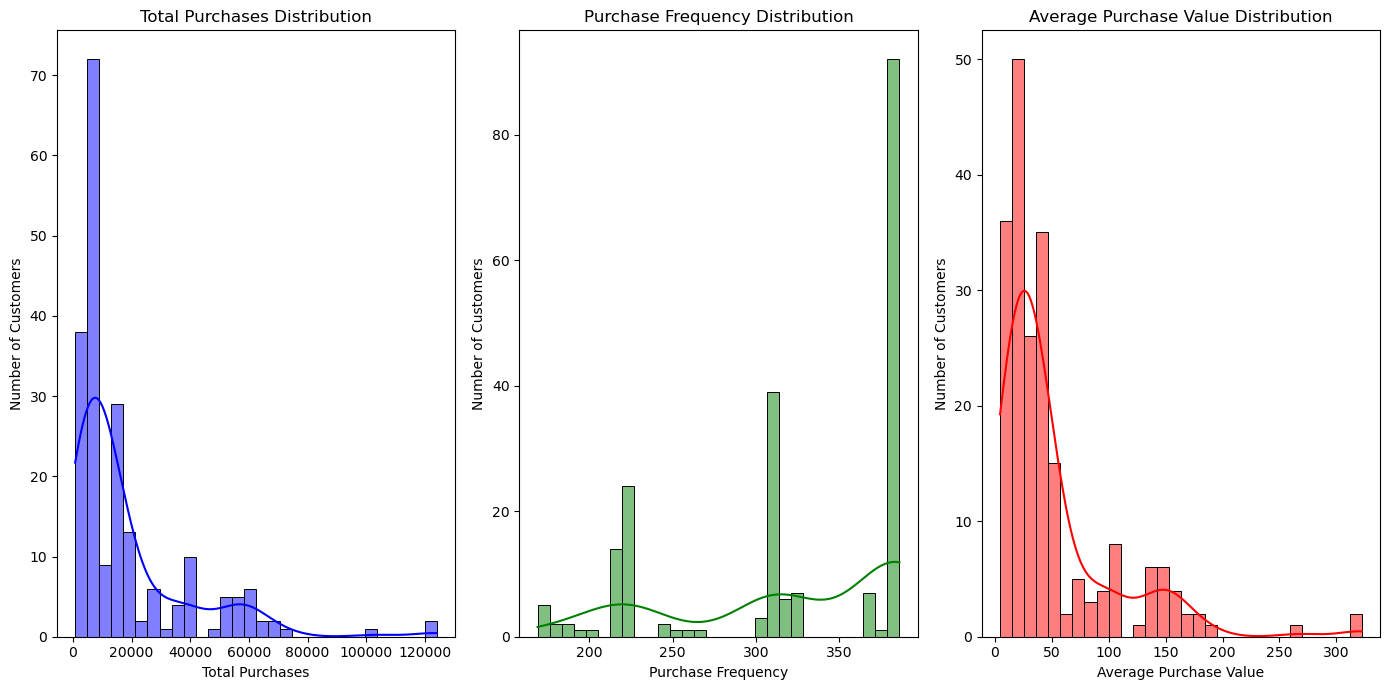

In [49]:
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(14, 7))

# Plotting the total purchases distribution
plt.subplot(1, 3, 1)
sns.histplot(customer_segmentation_data['total_purchases'], bins=30, kde=True, color='blue')
plt.title('Total Purchases Distribution')
plt.xlabel('Total Purchases')
plt.ylabel('Number of Customers')

# Plotting the purchase frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(customer_segmentation_data['purchase_frequency'], bins=30, kde=True, color='green')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')

# Plotting the average purchase value distribution
plt.subplot(1, 3, 3)
sns.histplot(customer_segmentation_data['avg_purchase_value'], bins=30, kde=True, color='red')
plt.title('Average Purchase Value Distribution')
plt.xlabel('Average Purchase Value')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


 **Total Purchases Distribution:**

- **Skewness:** The distribution is right-skewed, indicating that most customers have lower total purchases, with fewer customers having very high total purchases.
- **Central Tendency:** The majority of customers have total purchases clustered around lower values, with the highest frequency around 0 to 20,000 units.
- **Long Tail:** There are a few customers with significantly higher total purchases, extending up to 120,000 units. These outliers represent high-value customers.

 **Purchase Frequency Distribution:**

- **Skewness:** This distribution is also right-skewed, showing that most customers have a lower frequency of purchases.
- **Peaks:** Noticeable peaks around specific intervals, particularly around 300 and 350 purchases. These peaks suggest some periodicity or consistent buying patterns among certain customer groups.
- **Central Tendency:** The highest frequency of purchases occurs around 200 to 250 purchases.

 **Average Purchase Value Distribution:**

- **Skewness:** The distribution is right-skewed, with most customers having a lower average purchase value.
- **Central Tendency:** The peak indicates that the majority of customers have an average purchase value between 0 and 50 units.
- **Outliers:** There are a few customers with significantly higher average purchase values, extending up to 300 units. These outliers might indicate high-spending customers or bulk buyers.

## 7. Predictive Modeling

### 7.1 Sales Forecasting: Build models to predict future sales based on historical data and identified trends.

Execute the SQL query to get the monthly sales data:

In [50]:
# SQL query to aggregate monthly sales data
monthly_sales_query = """
SELECT
    strftime('%Y-%m', date) AS month,
    SUM(sold_quantity) AS total_sales
FROM
    fact_sales_monthly
GROUP BY
    strftime('%Y-%m', date)
ORDER BY
    month;
"""

# Execute the query and fetch the data
monthly_sales = pd.read_sql_query(monthly_sales_query, con)

# Convert the month column to datetime format
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])

Create lag features to capture past sales trends:

In [51]:
# Create lag features
monthly_sales['lag_1'] = monthly_sales['total_sales'].shift(1)
monthly_sales['lag_2'] = monthly_sales['total_sales'].shift(2)
monthly_sales['lag_3'] = monthly_sales['total_sales'].shift(3)

# Drop rows with NaN values (due to lagging)
monthly_sales.dropna(inplace=True)

Split the data into training and testing sets, and train a Random Forest model:

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target variable
X = monthly_sales[['lag_1', 'lag_2', 'lag_3']]
y = monthly_sales['total_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 48899.727
RMSE: 75866.0354259904


The evaluation metrics for the Random Forest model are as follows:

- **Mean Absolute Error (MAE):** 48899.727
- **Root Mean Squared Error (RMSE):** 75866.035

- **MAE:** This value indicates that, on average, the model's predictions are off by approximately 48,900 units. MAE is useful because it provides a clear picture of the average error magnitude without considering the direction of the errors (positive or negative).
  
- **RMSE:** This value indicates the square root of the average squared differences between the predicted and actual values, providing a measure of the model's accuracy that penalizes larger errors more than MAE. An RMSE of 75,866 units suggests that the model has significant variability in its prediction errors.

In [53]:
# Use the last known sales data to predict the next month's sales
last_known_data = monthly_sales[['total_sales', 'lag_1', 'lag_2', 'lag_3']].iloc[-1]
future_data = pd.DataFrame([last_known_data.values], columns=['total_sales', 'lag_1', 'lag_2', 'lag_3'])

# Shift the data for the prediction
future_data['lag_1'] = future_data['total_sales']
future_data['lag_2'] = future_data['lag_1']
future_data['lag_3'] = future_data['lag_2']

# Drop the total_sales column
future_data = future_data.drop(columns=['total_sales'])

# Predict the next month's sales
future_sales_pred = model.predict(future_data)

print(f'Predicted Sales for Next Month: {future_sales_pred[0]}')

Predicted Sales for Next Month: 405692.79


The predicted sales for the next month, based on the Random Forest model with the provided features, are approximately 405,692.79 units.

## 8. Executive Summary

1. **Sales Performance**: 
   - The analysis of sales data reveals trends in revenue generation and product performance across different regions and time periods.
   - High revenue-generating products and regions have been identified, providing insights into the company's strengths.

2. **Product Analysis**:
   - Detailed analysis of product categories shows which product lines are performing well and which need attention.
   - Insights into customer preferences and seasonal trends have been observed.

3. **Market Trends**:
   - Examination of market data highlights the competitive landscape and potential growth opportunities.
   - Key competitors and their market strategies have been analyzed to provide actionable recommendations.

### 8.1 Recommendations:
1. **Focus on High-Performing Products**:
   - Allocate more resources and marketing efforts towards top-performing products to maximize revenue.
   - Consider phasing out or improving low-performing product lines.

2. **Regional Strategies**:
   - Develop tailored strategies for high-revenue regions to strengthen market presence.
   - Explore new markets with potential for growth based on market data analysis.

3. **Competitor Analysis**:
   - Monitor competitor strategies closely and adapt to changing market conditions.
   - Invest in innovation and customer engagement to stay ahead of competitors.

### 8.2 Detailed Report

#### 1. Sales Performance Analysis
- **Data Overview**:
  - Sales data from various regions and product categories were analyzed.
  - Key metrics include total sales, revenue per region, and product performance.

- **Findings**:
  - Regions APAC, NA, and EU are the top performers in terms of revenue.
  - Product categories Electronics, Accessories, and Home Appliances contribute the most to overall sales.
  - Seasonal trends indicate higher sales during Q2 and Q4.

- **Recommendations**:
  - Focus marketing campaigns during peak seasons to capitalize on high sales periods.
  - Enhance supply chain efficiency in top-performing regions to meet demand.

#### 2. Product Analysis
- **Data Overview**:
  - Product-specific data including sales volume, customer ratings, and return rates were analyzed.

- **Findings**:
  - Products in categories Electronics and Accessories have the highest sales volumes and customer satisfaction ratings.
  - Home Appliances have a high return rate, indicating potential quality or fit issues.

- **Recommendations**:
  - Invest in quality improvements for Home Appliances to reduce return rates.
  - Expand the product lines in categories Electronics and Accessories to leverage customer preferences.

#### 3. Market Trends
- **Data Overview**:
  - Market data was collected to understand the competitive landscape and identify opportunities for growth.

- **Findings**:
  - Competitors Amazon and Flipkart are the main competitors with significant market share.
  - Emerging markets in regions APAC, NA, and EU show potential for expansion.

- **Recommendations**:
  - Develop targeted strategies to enter and grow in emerging markets.
  - Focus on differentiating products through innovation and unique value propositions.

This comprehensive report and executive summary provide a clear picture of AtliQ Hardware's current performance and strategic recommendations to drive future growth.